# Example: D-optimal experiment design with random datasets
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

In [1]:
%cd C:\\github\accbpg
# This should be removed after install accbpg using pip

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
#matplotlib.rcParams.update({'text.usetex': True})

### Compare BPG and ABPG with different values of gamma

In [4]:
import accbpg

# Generate a random instance of the D-optimal design problem of size m by n
m = 80
n = 200
f, h, L, x0 = accbpg.D_opt_design(m, n, randseed=10)

# Solve the problem using BPG and ABPG with different values of gamma (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=1000, linesearch=False, verbskip=100)
x10, F10, G10, T10 = accbpg.ABPG(f, h, L, x0, gamma=1.0, maxitrs=1000, theta_eq=True, verbskip=100)
x15, F15, G15, T15 = accbpg.ABPG(f, h, L, x0, gamma=1.5, maxitrs=1000, theta_eq=True, verbskip=100)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=1000, theta_eq=True, verbskip=100)
x22, F22, G22, T22 = accbpg.ABPG(f, h, L, x0, gamma=2.2, maxitrs=2000, theta_eq=True, verbskip=100)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.910e+01   1.000e+00     0.0
   100   1.759e+01   1.000e+00     0.2
   200   1.759e+01   1.000e+00     0.3
   300   1.759e+01   1.000e+00     0.4
   400   1.759e+01   1.000e+00     0.5
   500   1.759e+01   1.000e+00     0.6
   600   1.759e+01   1.000e+00     0.7
   700   1.759e+01   1.000e+00     0.8
   800   1.759e+01   1.000e+00     0.9
   900   1.759e+01   1.000e+00     1.1

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0   1.910e+01   1.000e+00   1.000e+00   2.395e-01   2.395e-01     0.0
   100   1.761e+01   9.901e-03   8.862e-03   2.862e-08   3.262e-04     0.1
   200   1.760e+01   4.975e-03   4.595e-03   2.225e-09   9.735e-05     0.3
   300   1.759e+01   3.322e-03   3.075e-03   5.425e-10   5.311e-05     0.4
   400   1.759e+01   2.494e-03   2.367e-03   1.777e-10   3.010e-05     0.5
   500   1.7

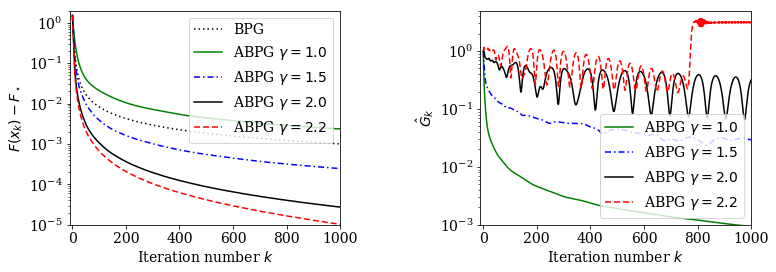

In [20]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"ABPG $\gamma=1.0$", r"ABPG $\gamma=1.5$", r"ABPG $\gamma=2.0$", r"ABPG $\gamma=2.2$"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, F10, F15, F20, F22]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-10, 1000], ylim=[1e-5, 2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [G10, G15, G20, G22]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-10, 1000], ylim=[1e-3, 5], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="lower right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()

### Comparing BPG with line search and adaptive ABPG algorithms

In [6]:
# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=1000, linesearch=False, verbskip=100)
xLS, FLS, GLS, TLS = accbpg.BPG( f, h, L, x0, maxitrs=1000, linesearch=True, verbskip=100)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=1000, theta_eq=True, verbskip=100)
x2e, F2e, Gamma2e, G2e, T2e = accbpg.ABPG_expo(f, h, L, x0, gamma0=3, maxitrs=1000, theta_eq=True, verbskip=100)
x2g, F2g, G2g, Gdiv2g, Gavg2g, T2g = accbpg.ABPG_gain(f, h, L, x0, gamma=2, maxitrs=3000, G0=0.1, theta_eq=True, verbskip=100)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.910e+01   1.000e+00     0.0
   100   1.759e+01   1.000e+00     0.2
   200   1.759e+01   1.000e+00     0.3
   300   1.759e+01   1.000e+00     0.4
   400   1.759e+01   1.000e+00     0.5
   500   1.759e+01   1.000e+00     0.6
   600   1.759e+01   1.000e+00     0.8
   700   1.759e+01   1.000e+00     0.9
   800   1.759e+01   1.000e+00     1.0
   900   1.759e+01   1.000e+00     1.1

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.910e+01   5.000e-01     0.0
   100   1.759e+01   1.250e-01     0.2
   200   1.759e+01   1.250e-01     0.5
   300   1.759e+01   5.000e-01     0.7
   400   1.759e+01   5.000e-01     0.9
   500   1.759e+01   5.000e-01     1.2
   600   1.759e+01   2.500e-01     1.4
   700   1.759e+01   2.500e-01     1.7
   800   1.759e+01   2.500e-01     1.9
   900   1.759e+01   1.250e-01     2.1

ABPG method for minimize_{x in C} F

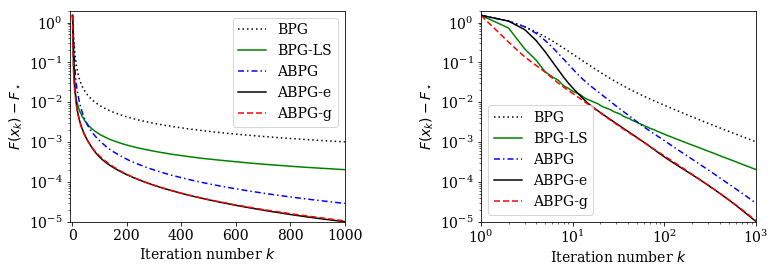

In [21]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG-e", r"ABPG-g"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, FLS, F20, F2e, F2g]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-10, 1000], ylim=[1e-5, 2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xscale='log', xlim=[1, 1000], ylim=[1e-5, 2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower left", 
                        linestyles=styles, linedash=dashes)

plt.tight_layout(w_pad=4)
plt.show()

### Comparing ABPG and ABPG with restart for nearly strongly convex problems

In [8]:
# Generate a random instance of the D-optimal design problem of size m by n
ms = 80
ns = 120
fs, hs, Ls, x0s = accbpg.D_opt_design(ms, ns, randseed=10)

# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE), also with restart
xs00, Fs00, Gs00, _ = accbpg.BPG( fs, hs, Ls, x0s, maxitrs=1000, linesearch=False, verbskip=100)
xsLS, FsLS, GsLS, _ = accbpg.BPG( fs, hs, Ls, x0s, maxitrs=1000, linesearch=True, verbskip=100)
xs20, Fs20, Gs20, _ = accbpg.ABPG(fs, hs, Ls, x0s, gamma=2.0, maxitrs=1000, theta_eq=True, restart=False, verbskip=100)
xs20rs, Fs20rs, Gs20rs, _ = accbpg.ABPG(fs, hs, Ls, x0s, gamma=2.0, maxitrs=1000, theta_eq=True, restart=True, verbskip=100)
xs2g, Fs2g, Gs2g, _, _, _ = accbpg.ABPG_gain(fs, hs, Ls, x0s, gamma=2, maxitrs=3000, G0=0.1, theta_eq=True, restart=False, verbskip=100)
xs2grs, Fs2grs, Gs2grs, _, _, _ = accbpg.ABPG_gain(fs, hs, Ls, x0s, gamma=2, maxitrs=3000, G0=0.1, theta_eq=True, restart=True, verbskip=100)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.764e+01   1.000e+00     0.0

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.764e+01   5.000e-01     0.0

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0   3.764e+01   1.000e+00   1.000e+00   1.642e-01   1.642e-01     0.0

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0   3.764e+01   1.000e+00   1.000e+00   1.642e-01   1.642e-01     0.0

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   3.764e+01   1.000e+00   5.160e-01   1.000e+00   6.216e-01   6.216e-01   7.183e-02     0.0

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)

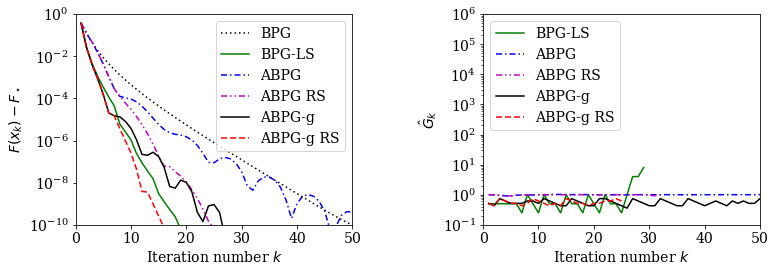

In [23]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG RS", r"ABPG-g", r"ABPG-g RS"]
styles = ['k:', 'g-', 'b-.', 'm-', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [4,2,1,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [Fs00, FsLS, Fs20, Fs20rs, Fs2g, Fs2grs]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[0, 50], ylim=[1e-10, 1], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes) 

ax2 = plt.subplot(1, 2, 2)
y_vals = [GsLS, Gs20, Gs20rs, Gs2g, Gs2grs]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[0, 50], ylim=[1e-1, 1e6], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="upper left", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()